In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv("cuisine_dataset.csv")


In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Top 10 Keywords in Rating Text:
[('average', 3737), ('good', 3179), ('not', 2148), ('rated', 2148), ('very', 1079), ('excellent', 301), ('poor', 186)]


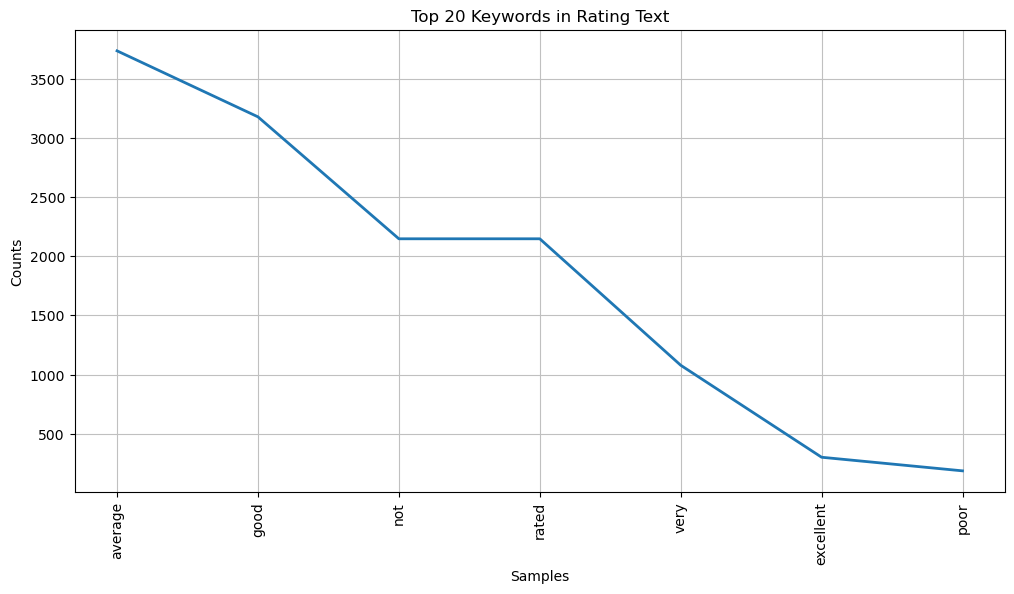

In [6]:
rating_text = " ".join(data['Rating text'].astype(str))

# Tokenize the text
tokens = word_tokenize(rating_text)

# Remove stopwords
stopwords_list = set(['and', 'for', 'with', 'at', 'the', 'in', 'of', 'on', 'to'])
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords_list]

# Display top keywords
print("Top 10 Keywords in Rating Text:")
fdist = FreqDist(filtered_tokens)
print(fdist.most_common(10))

# Visualize the results (optional)
plt.figure(figsize=(12, 6))
fdist.plot(20, title='Top 20 Keywords in Rating Text', cumulative=False)
plt.show()

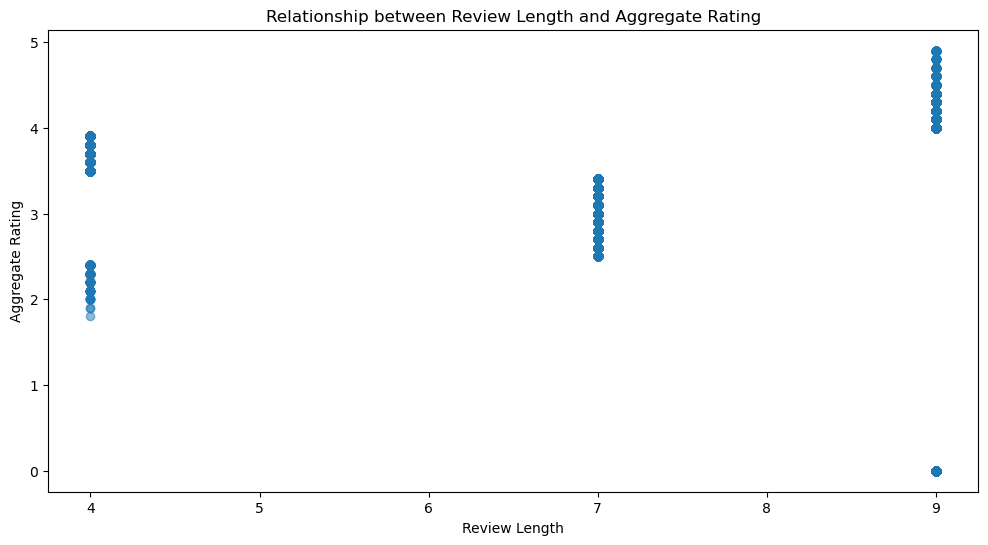

Average Review Length: 7.02 characters


In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming 'Rating text' is the column containing textual information
data['Rating text'] = data['Rating text'].astype(str)

# Calculate the length of each review
data['Review Length'] = data['Rating text'].apply(len)

# Explore the relationship between review length and rating
plt.figure(figsize=(12, 6))
plt.scatter(data['Review Length'], data['Aggregate rating'], alpha=0.5)
plt.title('Relationship between Review Length and Aggregate Rating')
plt.xlabel('Review Length')
plt.ylabel('Aggregate Rating')
plt.show()

# Calculate the average review length
average_review_length = data['Review Length'].mean()
print(f'Average Review Length: {average_review_length:.2f} characters')
